In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
devices = tf.config.list_physical_devices('GPU')
print(len(devices)) 

1


In [3]:
tf.random.set_seed(23)

In [4]:
img_df = pd.read_csv("photos/image_labels.csv")
img_df.head()

,path,class,label,image_id
0,one_1.jpg,one,0,11
1,one_10.jpg,one,0,11
2,one_11.jpg,one,0,11
3,one_12.jpg,one,0,11
4,one_13.jpg,one,0,11


In [5]:
len(img_df)

992

### Resize images

In [6]:
from PIL import Image

(new_width, new_height) = (128, 128)

path = "photos/original/"
filenames = img_df["path"]

for filename in filenames:
    with Image.open(f"{path}/{filename}") as im:
        width, height = im.size
        if height >= width:
            left = 0
            top = (height-width)/2
            right = width
            bottom = width+(height-width)/2
        else:
            left = (width-height)/2
            top = 0
            right = height+(width-height)/2
            bottom = height
        im_cropped = im.crop((left, top, right, bottom))
        im_resized = im_cropped.resize((new_width, new_height), resample=Image.HAMMING)
        im_resized.save(f"photos/resized/128/{filename}")

### Create dataset

In [33]:
filenames = img_df["path"]
labels = img_df["label"]
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [34]:
def decode_images(file):
  path = f"./photos/resized/128/{file}"
  print(path)
  image_decoded = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)/255
  im = tf.cast(image_decoded, tf.float32)
  return im

decoded_images = list(map(lambda file: decode_images(file), list(filenames)))

./photos/resized/224/one_1.jpg
./photos/resized/224/one_10.jpg
./photos/resized/224/one_11.jpg
./photos/resized/224/one_12.jpg
./photos/resized/224/one_13.jpg
./photos/resized/224/one_14.jpg
./photos/resized/224/one_15.jpg
./photos/resized/224/one_16.jpg
./photos/resized/224/one_17.jpg
./photos/resized/224/one_18.jpg
./photos/resized/224/one_19.jpg
./photos/resized/224/one_2.jpg
./photos/resized/224/one_20.jpg
./photos/resized/224/one_21.jpg
./photos/resized/224/one_22.jpg
./photos/resized/224/one_23.jpg
./photos/resized/224/one_24.jpg
./photos/resized/224/one_25.jpg
./photos/resized/224/one_26.jpg
./photos/resized/224/one_27.jpg
./photos/resized/224/one_28.jpg
./photos/resized/224/one_29.jpg
./photos/resized/224/one_3.jpg
./photos/resized/224/one_30.jpg
./photos/resized/224/one_31.jpg
./photos/resized/224/one_32.jpg
./photos/resized/224/one_4.jpg
./photos/resized/224/one_5.jpg
./photos/resized/224/one_6.jpg
./photos/resized/224/one_7.jpg
./photos/resized/224/one_8.jpg
./photos/resized

In [35]:
print(decoded_images[1])

tf.Tensor(
[[[0.5882353  0.50980395 0.48235294]
  [0.58431375 0.5058824  0.47843137]
  [0.58431375 0.5058824  0.47843137]
  ...
  [0.7882353  0.8352941  0.827451  ]
  [0.84313726 0.8901961  0.88235295]
  [0.88235295 0.92941177 0.9137255 ]]

 [[0.58431375 0.5058824  0.47843137]
  [0.58431375 0.5058824  0.47843137]
  [0.5803922  0.5019608  0.4745098 ]
  ...
  [0.8862745  0.93333334 0.93333334]
  [0.90588236 0.9529412  0.94509804]
  [0.9098039  0.95686275 0.9490196 ]]

 [[0.58431375 0.5058824  0.47843137]
  [0.5803922  0.5019608  0.4745098 ]
  [0.5803922  0.5019608  0.4745098 ]
  ...
  [0.972549   1.         1.        ]
  [0.972549   1.         1.        ]
  [0.95686275 0.99607843 1.        ]]

 ...

 [[0.3019608  0.32156864 0.3372549 ]
  [0.3019608  0.32156864 0.3372549 ]
  [0.3019608  0.32156864 0.3372549 ]
  ...
  [0.7294118  0.7607843  0.7176471 ]
  [0.7294118  0.7607843  0.7176471 ]
  [0.7254902  0.75686276 0.7137255 ]]

 [[0.3019608  0.32156864 0.3372549 ]
  [0.3019608  0.32156864 0

In [36]:
labels = tf.constant(labels)

In [37]:
print(labels)

tf.Tensor(
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 

In [38]:
dataset = tf.data.Dataset.from_tensor_slices((decoded_images, labels))

In [39]:
len(dataset)

992

In [40]:
dataset = dataset.shuffle(1000)

In [41]:
dataset

<ShuffleDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Text(0.5, 1.0, 'eight')

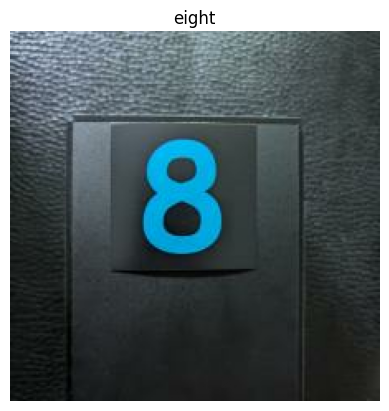

In [42]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.axis("off")
plt.title(classes[label])

In [43]:
path = "./datasets/original_128"

dataset.save(path)

### Data augmentation

In [6]:
path = "./datasets/original_128"

dataset = tf.data.Dataset.load(path)


In [7]:
len(dataset)

992

In [8]:
dataset = dataset.shuffle(1000)

In [9]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'Alphabet_y')

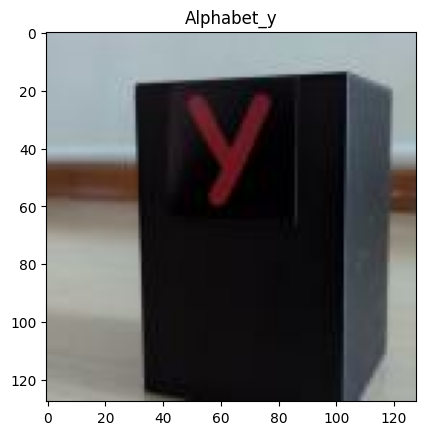

In [11]:
image, label = next(iter(dataset))
plt.imshow(image)
plt.title(classes[label])

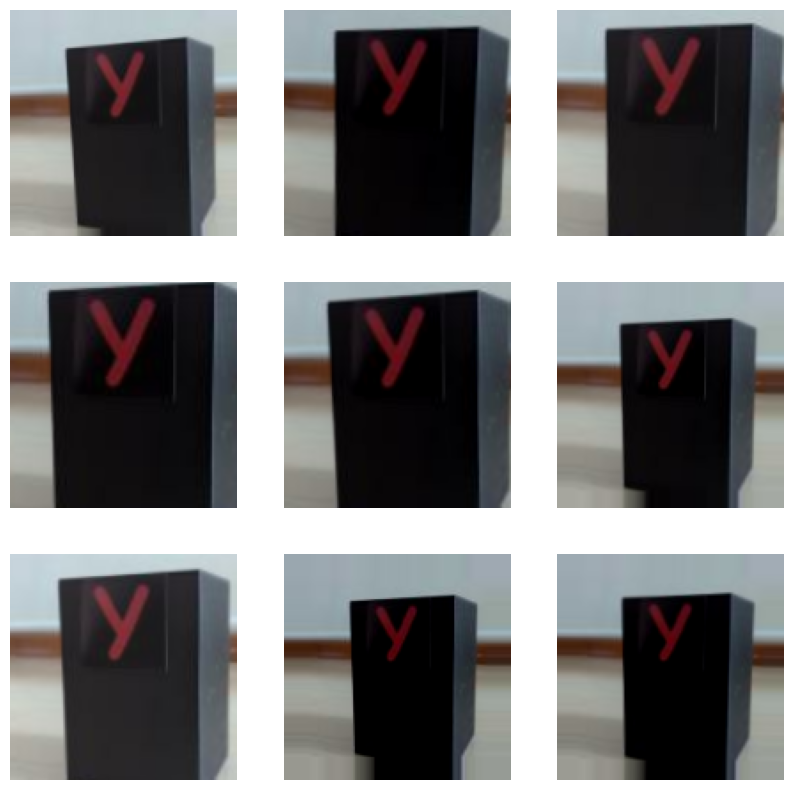

In [25]:
plt.figure(figsize=(10, 10))
for i in range(9):
  new_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

### Train-test-val split

In [26]:
path = "./datasets/original_128"

full_dataset = tf.data.Dataset.load(path)


In [27]:
classes = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
           "Alphabet_A", "Alphabet_B", "Alphabet_C", "Alphabet_D", "Alphabet_E", "Alphabet_F", "Alphabet_G", "Alphabet_H", "Alphabet_S", "Alphabet_T", "Alphabet_U", "Alphabet_v", "Alphabet_w", "Alphabet_x", "Alphabet_y", "Alphabet_z", 
           "up_arrow", "down_arrow", "right_arrow", "left_arrow", "Stop", "Bullseye"]

In [28]:
len(full_dataset)

992

In [29]:
full_dataset = full_dataset.shuffle(1000)

In [30]:
val_size = test_size = int(0.15*len(full_dataset))
train_size = len(full_dataset) - val_size - test_size

train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

print(len(train_dataset), len(val_dataset), len(test_dataset))

696 148 148


In [12]:
#check if all datasets contain all classes
train_labels = []
for image, label in train_dataset:
    train_labels.append(int(label))

print(len(np.unique(train_labels)))

val_labels = []
for image, label in val_dataset:
    val_labels.append(int(label))

print(len(np.unique(val_labels)))

test_labels = []
for image, label in test_dataset:
    test_labels.append(int(label))

print(len(np.unique(test_labels)))

31
31
31


In [31]:
batch_size = 64

train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [12]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### CNN

In [32]:
img_shape = (128, 128, 3,)

In [33]:
data_augmentation = keras.Sequential(
  [
    keras.Input(shape=img_shape),
    layers.RandomZoom(0.25, fill_mode="nearest"),
    layers.RandomRotation(0.006, fill_mode="nearest"),
    layers.RandomBrightness(0.00045),
    layers.RandomContrast(0.00045)
  ]
)

Text(0.5, 1.0, 'eight')

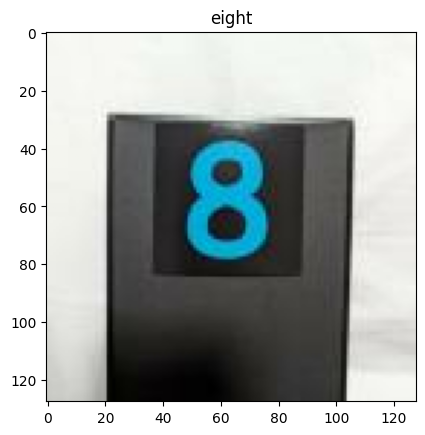

In [34]:
images, labels = next(iter(train_dataset))
plt.imshow(images[0])
plt.title(classes[labels[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


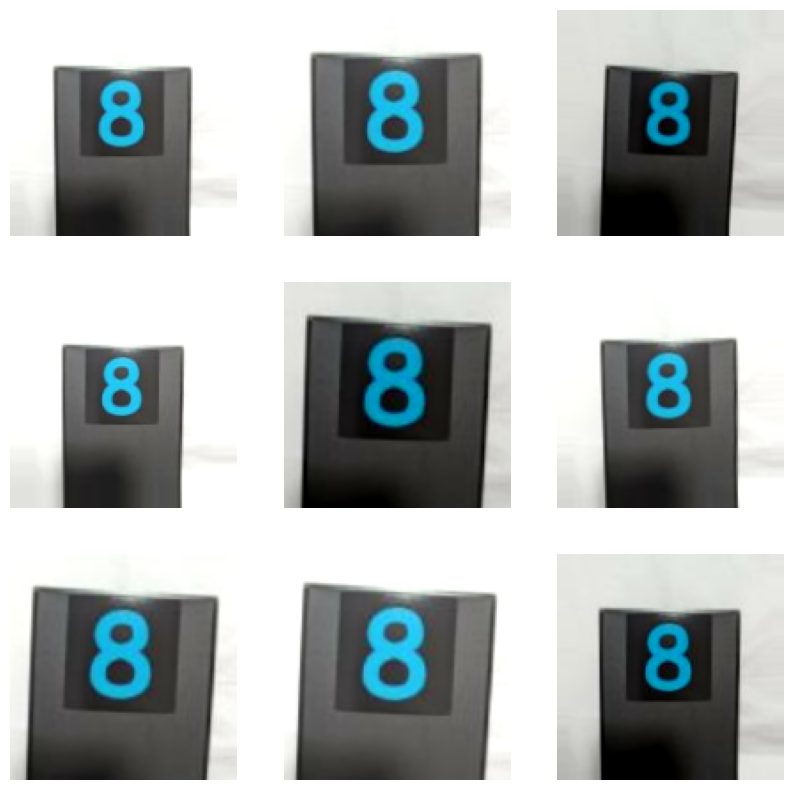

In [37]:
plt.figure(figsize=(10, 10))

for i in range(9):
  new_images = data_augmentation(images)
  new_image = new_images[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(new_image)
  plt.axis("off")

In [38]:
cnn_model = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Conv2D(12, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(24, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(48, 3, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [44]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [45]:
checkpoint_filepath = 'models/testing/cnn_model.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [46]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [47]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 12)      336       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 24)        2616      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 24)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 48)       

In [48]:
epochs = 100

history = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


11/11 [==============================] - 20s 1s/step - loss: 3.4365 - accuracy: 0.0230 - val_loss: 3.4339 - val_accuracy: 0.0135
Epoch 2/100
11/11 [==============================] - 13s 1s/step - loss: 3.4320 - accuracy: 0.0345 - val_loss: 3.4305 - val_accuracy: 0.0338
Epoch 3/100
11/11 [==============================] - 12s 1s/step - loss: 3.4302 - accuracy: 0.0474 - val_loss: 3.4303 - val_accuracy: 0.0541
Epoch 4/100
11/11 [==============================] - 11s 1s/step - loss: 3.4242 - accuracy: 0.0575 - val_loss: 3.4201 - val_accuracy: 0.0473
Epoch 5/100
11/11 [==============================] - 12s 1s/step - loss: 3.4150 - accuracy: 0.0647 - val_loss: 3.3891 - val_accuracy: 0.0541
Epoch 6/100
11/11 [==============================] - 11s 1s/step - loss: 3.3957 - accuracy: 0.0388 - val_loss: 3.3902 - val_accuracy: 0.0541
Epoch 7/100
11/11 [==============================] - 12s 1s/step - loss: 3.3562 - accuracy: 0.0661 - val_loss: 3.3418 - val_accuracy: 0.0743
Epoch 8/100
11/11 [======

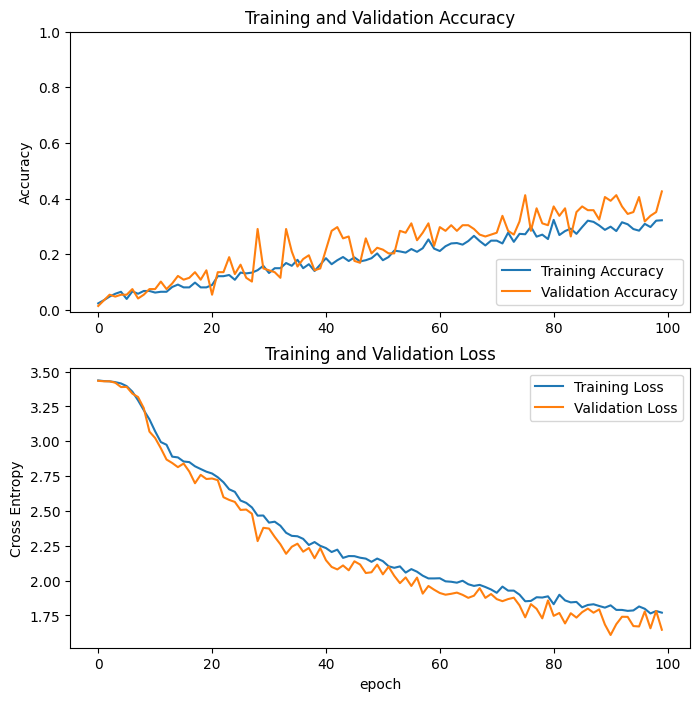

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [50]:
#increase learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.005)

In [51]:
cnn_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [52]:
#train for another 200 epochs
epochs = 200

history1 = cnn_model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs, 
  callbacks=[model_checkpoint_callback]
)

Epoch 1/200


11/11 [==============================] - 15s 1s/step - loss: 2.6154 - accuracy: 0.2385 - val_loss: 2.1653 - val_accuracy: 0.2095
Epoch 2/200
11/11 [==============================] - 12s 1s/step - loss: 2.1303 - accuracy: 0.2098 - val_loss: 1.9423 - val_accuracy: 0.3649
Epoch 3/200
11/11 [==============================] - 12s 1s/step - loss: 2.0709 - accuracy: 0.2500 - val_loss: 1.8942 - val_accuracy: 0.3649
Epoch 4/200
11/11 [==============================] - 12s 1s/step - loss: 1.9554 - accuracy: 0.2888 - val_loss: 1.8349 - val_accuracy: 0.3514
Epoch 5/200
11/11 [==============================] - 12s 1s/step - loss: 1.8325 - accuracy: 0.2945 - val_loss: 1.6881 - val_accuracy: 0.3514
Epoch 6/200
11/11 [==============================] - 12s 1s/step - loss: 1.8642 - accuracy: 0.2687 - val_loss: 1.7414 - val_accuracy: 0.3378
Epoch 7/200
11/11 [==============================] - 11s 1s/step - loss: 1.7707 - accuracy: 0.2989 - val_loss: 1.6828 - val_accuracy: 0.3716
Epoch 8/200
11/11 [======

In [53]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

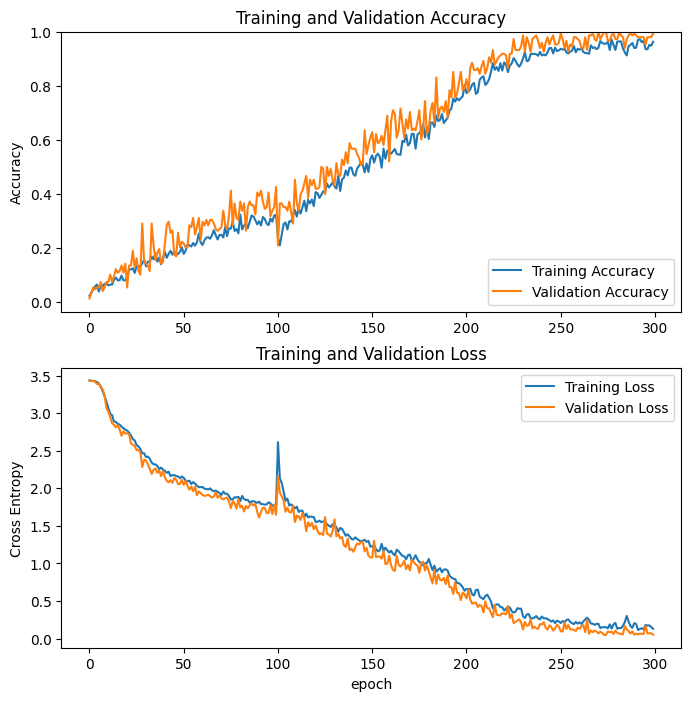

In [54]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [55]:
results = cnn_model.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 1s 7ms/step - loss: 0.0628 - accuracy: 1.0000
test loss, test acc: [0.06275768578052521, 1.0]


In [59]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

1/1 [==============================] - 0s 15ms/step


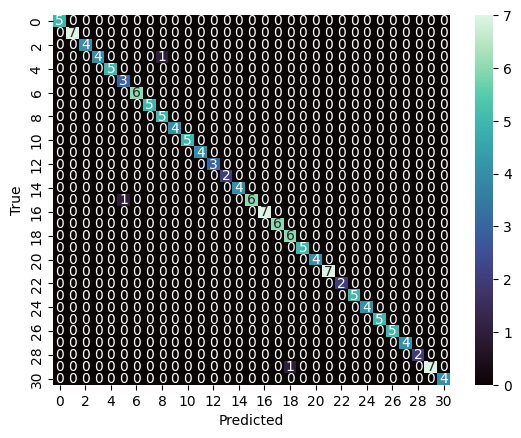

In [60]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

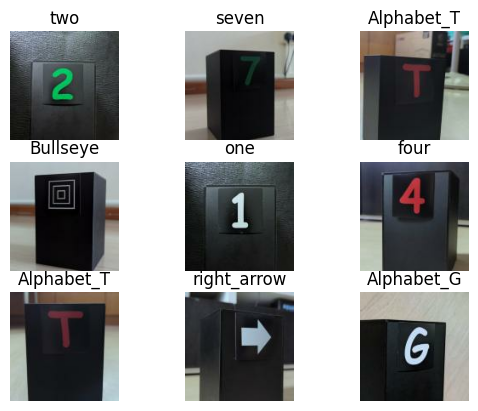

In [62]:
images, labels = next(iter(test_dataset))
preds = cnn_model(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [59]:
#cnn_model.save("./models/testing/cnn_model.keras")

#### depthwise convolution

In [63]:
img_shape = (128, 128, 3,)

In [64]:
cnn_model_dw = Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.SeparableConv2D(12, 3, 1, depth_multiplier=1, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(24, 3, 1, depth_multiplier=1, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.SeparableConv2D(48, 3, 1, depth_multiplier=1, activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling2D(),
  layers.Dense(len(classes))
])


In [66]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [67]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [68]:
cnn_model_dw.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 separable_conv2d (Separable  (None, 126, 126, 12)     75        
 Conv2D)                                                         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 12)       0         
 2D)                                                             
                                                                 
 separable_conv2d_1 (Separab  (None, 61, 61, 24)       420       
 leConv2D)                                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 24)       0         
 2D)                                                  

In [97]:
checkpoint_filepath = 'models/testing/cnn_model_dw.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [69]:
epochs = 100

history = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


11/11 [==============================] - 15s 1s/step - loss: 3.4342 - accuracy: 0.0259 - val_loss: 3.4333 - val_accuracy: 0.0405
Epoch 2/100
11/11 [==============================] - 11s 1s/step - loss: 3.4343 - accuracy: 0.0244 - val_loss: 3.4339 - val_accuracy: 0.0405
Epoch 3/100
11/11 [==============================] - 12s 999ms/step - loss: 3.4340 - accuracy: 0.0374 - val_loss: 3.4344 - val_accuracy: 0.0338
Epoch 4/100
11/11 [==============================] - 11s 999ms/step - loss: 3.4341 - accuracy: 0.0302 - val_loss: 3.4339 - val_accuracy: 0.0270
Epoch 5/100
11/11 [==============================] - 11s 997ms/step - loss: 3.4340 - accuracy: 0.0330 - val_loss: 3.4343 - val_accuracy: 0.0270
Epoch 6/100
11/11 [==============================] - 12s 1s/step - loss: 3.4336 - accuracy: 0.0302 - val_loss: 3.4327 - val_accuracy: 0.0541
Epoch 7/100
11/11 [==============================] - 12s 1s/step - loss: 3.4334 - accuracy: 0.0345 - val_loss: 3.4328 - val_accuracy: 0.0473
Epoch 8/100
11/1

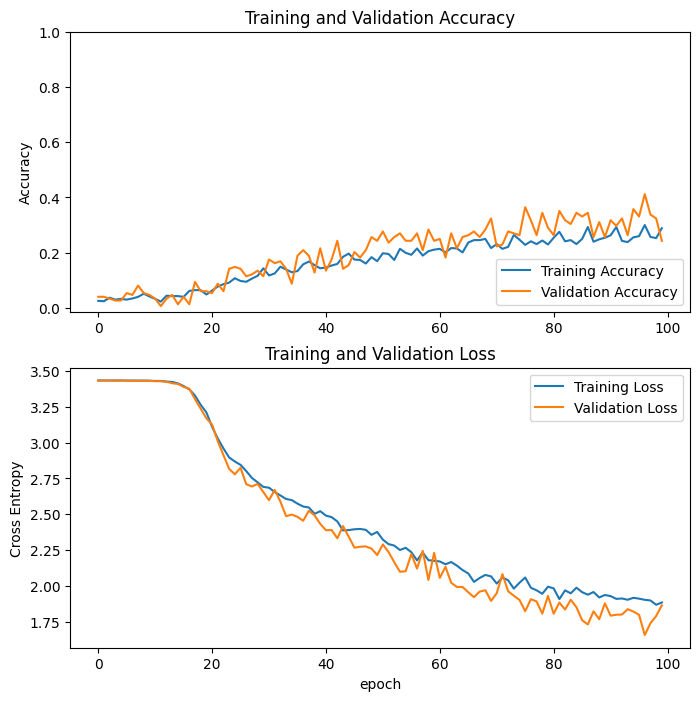

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [71]:
#increase learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.005)

cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [72]:
#train for another 200 epochs
epochs = 200

history1 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/200


11/11 [==============================] - 15s 1s/step - loss: 2.1877 - accuracy: 0.1954 - val_loss: 2.0470 - val_accuracy: 0.2027
Epoch 2/200
11/11 [==============================] - 12s 1s/step - loss: 2.0169 - accuracy: 0.2213 - val_loss: 1.9739 - val_accuracy: 0.1959
Epoch 3/200
11/11 [==============================] - 11s 1s/step - loss: 1.9370 - accuracy: 0.2371 - val_loss: 1.8571 - val_accuracy: 0.2703
Epoch 4/200
11/11 [==============================] - 11s 1s/step - loss: 1.9422 - accuracy: 0.2414 - val_loss: 1.7783 - val_accuracy: 0.2568
Epoch 5/200
11/11 [==============================] - 11s 997ms/step - loss: 1.9588 - accuracy: 0.2284 - val_loss: 1.7730 - val_accuracy: 0.1959
Epoch 6/200
11/11 [==============================] - 11s 1s/step - loss: 1.9253 - accuracy: 0.2787 - val_loss: 1.8686 - val_accuracy: 0.2838
Epoch 7/200
11/11 [==============================] - 12s 1s/step - loss: 1.8947 - accuracy: 0.2471 - val_loss: 1.8903 - val_accuracy: 0.3041
Epoch 8/200
11/11 [===

In [73]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

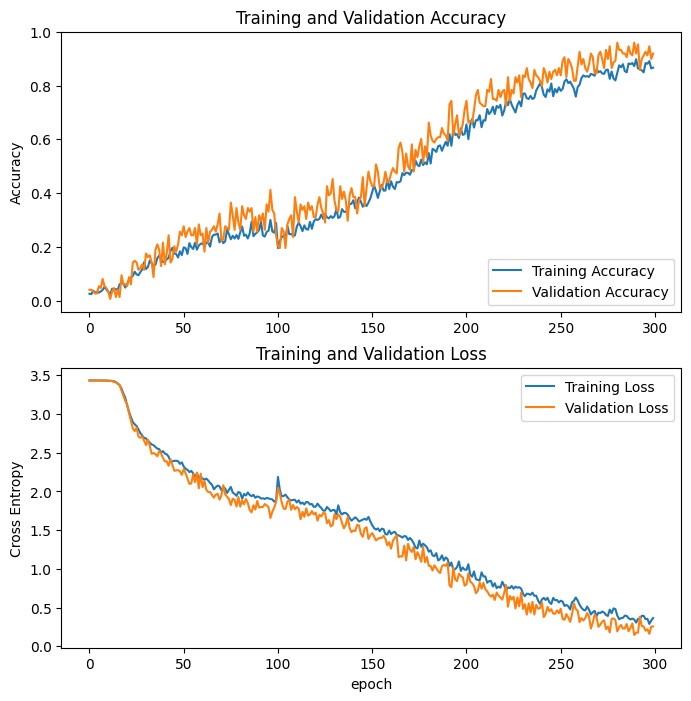

In [74]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [75]:
#decrease
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [76]:
cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [77]:
#train for another 100 epochs
epochs = 100

history2 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/100


11/11 [==============================] - 16s 1s/step - loss: 0.2987 - accuracy: 0.8951 - val_loss: 0.1587 - val_accuracy: 0.9459
Epoch 2/100
11/11 [==============================] - 12s 1s/step - loss: 0.2903 - accuracy: 0.9095 - val_loss: 0.1294 - val_accuracy: 0.9527
Epoch 3/100
11/11 [==============================] - 12s 1s/step - loss: 0.2370 - accuracy: 0.9253 - val_loss: 0.1494 - val_accuracy: 0.9662
Epoch 4/100
11/11 [==============================] - 12s 1s/step - loss: 0.2290 - accuracy: 0.9224 - val_loss: 0.1272 - val_accuracy: 0.9730
Epoch 5/100
11/11 [==============================] - 11s 975ms/step - loss: 0.2501 - accuracy: 0.9124 - val_loss: 0.1138 - val_accuracy: 0.9662
Epoch 6/100
11/11 [==============================] - 12s 1s/step - loss: 0.2552 - accuracy: 0.9023 - val_loss: 0.1400 - val_accuracy: 0.9527
Epoch 7/100
11/11 [==============================] - 11s 992ms/step - loss: 0.2393 - accuracy: 0.9253 - val_loss: 0.1053 - val_accuracy: 0.9662
Epoch 8/100
11/11 [

In [78]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

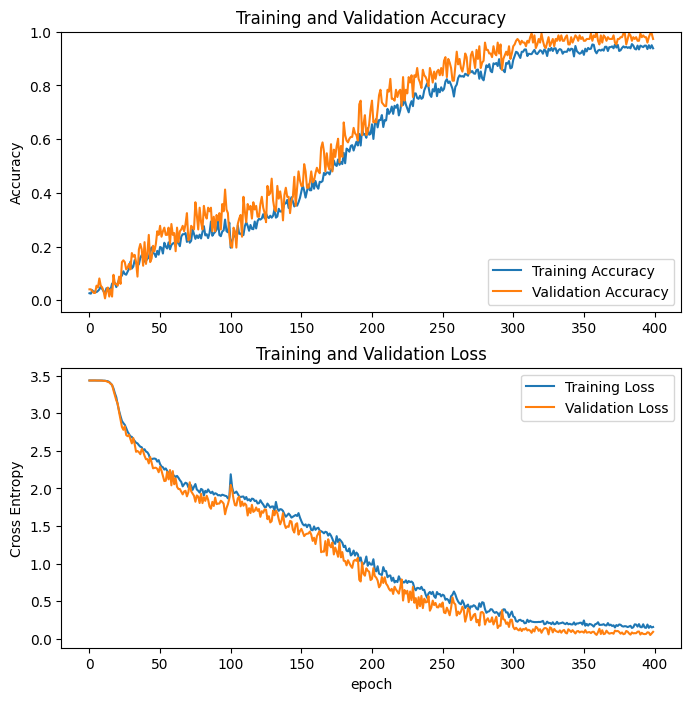

In [79]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [81]:
#decrease learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

cnn_model_dw.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [82]:
#train for another 25 epochs
epochs = 25

history3 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


11/11 [==============================] - 15s 1s/step - loss: 0.1309 - accuracy: 0.9540 - val_loss: 0.0449 - val_accuracy: 0.9932
Epoch 2/25
11/11 [==============================] - 12s 990ms/step - loss: 0.1423 - accuracy: 0.9497 - val_loss: 0.0830 - val_accuracy: 0.9797
Epoch 3/25
11/11 [==============================] - 12s 1s/step - loss: 0.1432 - accuracy: 0.9483 - val_loss: 0.1029 - val_accuracy: 0.9595
Epoch 4/25
11/11 [==============================] - 11s 1s/step - loss: 0.1928 - accuracy: 0.9224 - val_loss: 0.0585 - val_accuracy: 0.9865
Epoch 5/25
11/11 [==============================] - 12s 1s/step - loss: 0.1323 - accuracy: 0.9598 - val_loss: 0.0685 - val_accuracy: 0.9865
Epoch 6/25
11/11 [==============================] - 12s 1s/step - loss: 0.1467 - accuracy: 0.9555 - val_loss: 0.0721 - val_accuracy: 0.9865
Epoch 7/25
11/11 [==============================] - 11s 991ms/step - loss: 0.1462 - accuracy: 0.9454 - val_loss: 0.0553 - val_accuracy: 0.9932
Epoch 8/25
11/11 [=======

In [83]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

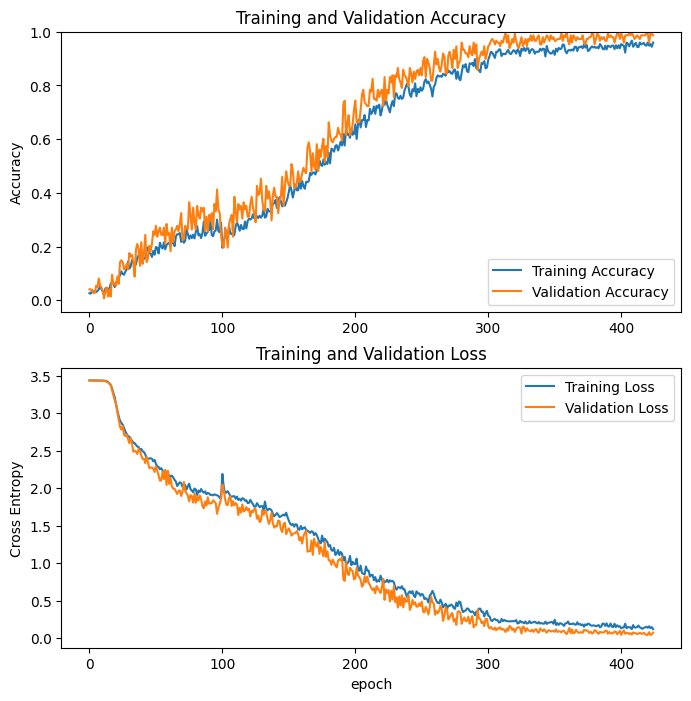

In [84]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [86]:
#train for another 25 epochs
epochs = 25

history4 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


11/11 [==============================] - 12s 1s/step - loss: 0.1317 - accuracy: 0.9511 - val_loss: 0.0696 - val_accuracy: 0.9865
Epoch 2/25
11/11 [==============================] - 11s 1s/step - loss: 0.1407 - accuracy: 0.9555 - val_loss: 0.0746 - val_accuracy: 0.9865
Epoch 3/25
11/11 [==============================] - 11s 990ms/step - loss: 0.1275 - accuracy: 0.9655 - val_loss: 0.0771 - val_accuracy: 0.9730
Epoch 4/25
11/11 [==============================] - 11s 1s/step - loss: 0.1415 - accuracy: 0.9483 - val_loss: 0.0695 - val_accuracy: 0.9662
Epoch 5/25
11/11 [==============================] - 11s 1s/step - loss: 0.1438 - accuracy: 0.9511 - val_loss: 0.0692 - val_accuracy: 0.9797
Epoch 6/25
11/11 [==============================] - 11s 1s/step - loss: 0.1179 - accuracy: 0.9612 - val_loss: 0.0749 - val_accuracy: 0.9730
Epoch 7/25
11/11 [==============================] - 12s 1s/step - loss: 0.1762 - accuracy: 0.9411 - val_loss: 0.0709 - val_accuracy: 0.9730
Epoch 8/25
11/11 [==========

In [87]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history, history4.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

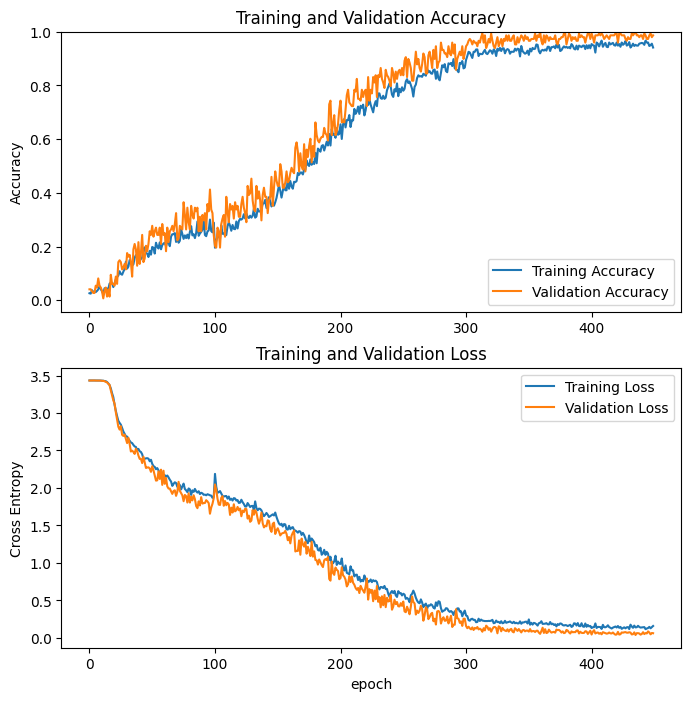

In [88]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [98]:
#train for another 25 epochs
epochs = 25

history5 = cnn_model_dw.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/25


11/11 [==============================] - 12s 1s/step - loss: 0.1401 - accuracy: 0.9440 - val_loss: 0.0476 - val_accuracy: 0.9932
Epoch 2/25
11/11 [==============================] - 11s 991ms/step - loss: 0.1395 - accuracy: 0.9555 - val_loss: 0.0561 - val_accuracy: 0.9730
Epoch 3/25
11/11 [==============================] - 12s 1s/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.0530 - val_accuracy: 0.9797
Epoch 4/25
11/11 [==============================] - 12s 1s/step - loss: 0.1388 - accuracy: 0.9598 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 5/25
11/11 [==============================] - 12s 1s/step - loss: 0.1401 - accuracy: 0.9583 - val_loss: 0.0810 - val_accuracy: 0.9797
Epoch 6/25
11/11 [==============================] - 12s 1s/step - loss: 0.1551 - accuracy: 0.9440 - val_loss: 0.0632 - val_accuracy: 0.9932
Epoch 7/25
11/11 [==============================] - 12s 1s/step - loss: 0.1286 - accuracy: 0.9655 - val_loss: 0.0608 - val_accuracy: 0.9865
Epoch 8/25
11/11 [==========

In [99]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history.history, history1.history, history2.history, history3.history, history4.history, history5.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

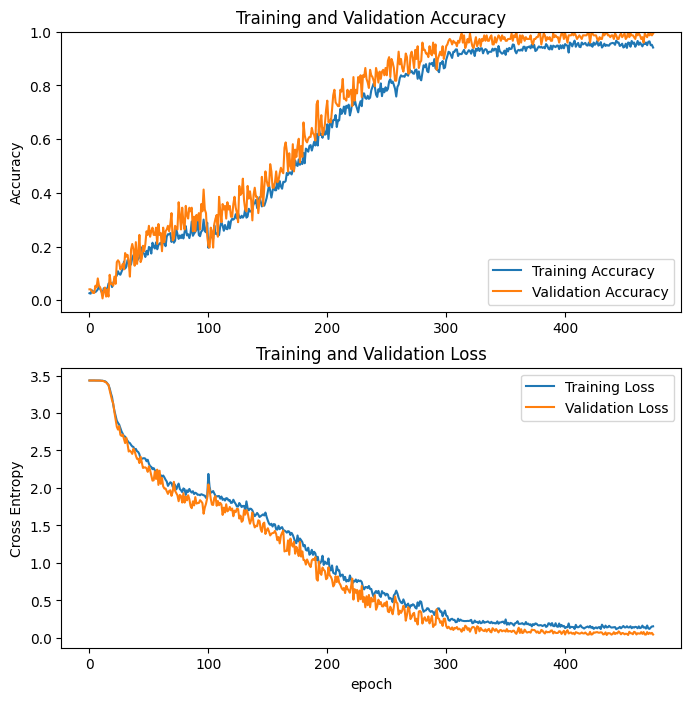

In [100]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [101]:
results = cnn_model_dw.evaluate(test_dataset, batch_size=64)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 7ms/step - loss: 0.0412 - accuracy: 0.9932
test loss, test acc: [0.04120279476046562, 0.9932432174682617]


In [102]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = cnn_model_dw.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

1/1 [==============================] - 0s 16ms/step


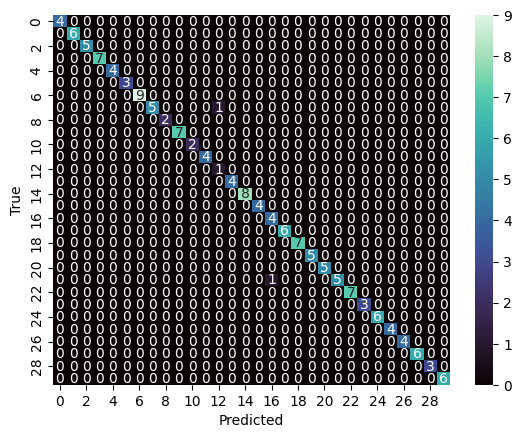

In [103]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

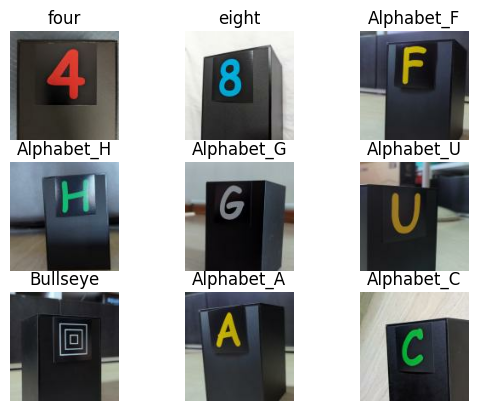

In [104]:
images, labels = next(iter(test_dataset))
preds = cnn_model_dw(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [41]:
#cnn_model_dw.save("./models/testing/cnn_model_dw.keras")

### Finetune pretrained model

In [105]:
img_shape = (128, 128, 3)

In [106]:
mobnetv3 = keras.applications.MobileNetV3Small(
  input_shape=img_shape,
  classes=len(classes),
  include_top=False,
  weights='imagenet',
  pooling=None,
  include_preprocessing=True
)

In [107]:
mobnetv3.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 64, 64, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 64, 64, 16)  64          ['Conv[0][0]']    

In [108]:
len(mobnetv3.layers)

229

In [109]:
for layer in mobnetv3.layers:
    layer.trainable = True


In [110]:
mobnetv3_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  mobnetv3,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [111]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = mobnetv3_ft(image_batch)
print(feature_batch.shape)

(64, 31)


In [112]:
mobnetv3_ft.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 MobilenetV3small (Functiona  (None, 4, 4, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 31)               

In [113]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [114]:
mobnetv3_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
checkpoint_filepath = 'models/testing/mobnetv3_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [116]:
epochs = 50

history_mobnet = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/50


11/11 [==============================] - 23s 2s/step - loss: 3.9082 - accuracy: 0.0532 - val_loss: 3.8898 - val_accuracy: 0.0338
Epoch 2/50
11/11 [==============================] - 12s 1s/step - loss: 3.6943 - accuracy: 0.0632 - val_loss: 3.7947 - val_accuracy: 0.0338
Epoch 3/50
11/11 [==============================] - 12s 1s/step - loss: 3.4401 - accuracy: 0.0833 - val_loss: 3.7129 - val_accuracy: 0.0270
Epoch 4/50
11/11 [==============================] - 16s 1s/step - loss: 3.3364 - accuracy: 0.1020 - val_loss: 3.4997 - val_accuracy: 0.0608
Epoch 5/50
11/11 [==============================] - 12s 1s/step - loss: 3.1299 - accuracy: 0.1351 - val_loss: 3.4035 - val_accuracy: 0.0608
Epoch 6/50
11/11 [==============================] - 18s 2s/step - loss: 2.9700 - accuracy: 0.1868 - val_loss: 3.3279 - val_accuracy: 0.0878
Epoch 7/50
11/11 [==============================] - 17s 1s/step - loss: 2.8086 - accuracy: 0.2342 - val_loss: 3.0841 - val_accuracy: 0.1351
Epoch 8/50
11/11 [=============

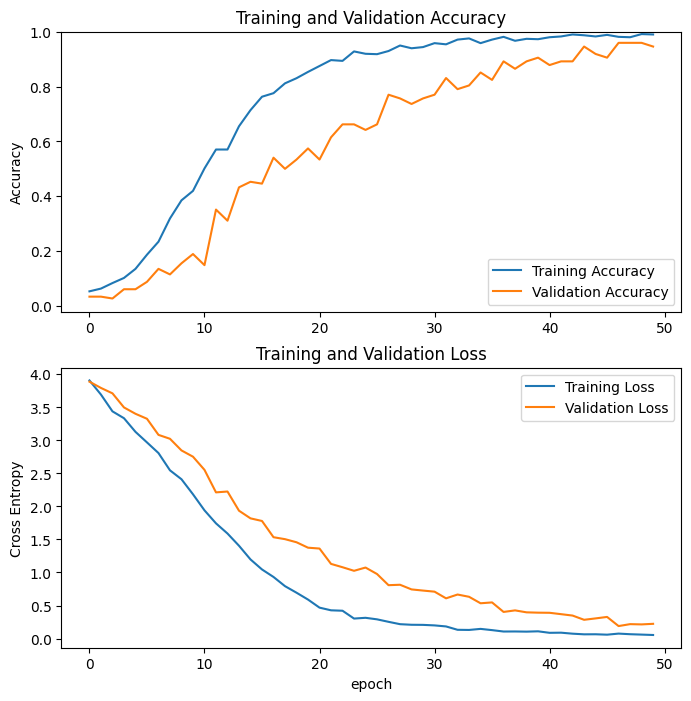

In [117]:
acc = history_mobnet.history['accuracy']
val_acc = history_mobnet.history['val_accuracy']

loss = history_mobnet.history['loss']
val_loss = history_mobnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [118]:
optimizer = keras.optimizers.Adam(learning_rate=0.00001)

In [119]:
mobnetv3_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [120]:
#train for another 25 epochs
epochs = 25

history_mobnet1 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/25


11/11 [==============================] - 20s 1s/step - loss: 0.0557 - accuracy: 0.9885 - val_loss: 0.2061 - val_accuracy: 0.9459
Epoch 2/25
11/11 [==============================] - 13s 1s/step - loss: 0.0655 - accuracy: 0.9899 - val_loss: 0.2555 - val_accuracy: 0.9189
Epoch 3/25
11/11 [==============================] - 14s 1s/step - loss: 0.0570 - accuracy: 0.9871 - val_loss: 0.2289 - val_accuracy: 0.9459
Epoch 4/25
11/11 [==============================] - 13s 1s/step - loss: 0.0551 - accuracy: 0.9856 - val_loss: 0.2255 - val_accuracy: 0.9324
Epoch 5/25
11/11 [==============================] - 15s 1s/step - loss: 0.0519 - accuracy: 0.9885 - val_loss: 0.1730 - val_accuracy: 0.9662
Epoch 6/25
11/11 [==============================] - 12s 1s/step - loss: 0.0525 - accuracy: 0.9885 - val_loss: 0.1932 - val_accuracy: 0.9459
Epoch 7/25
11/11 [==============================] - 12s 1s/step - loss: 0.0392 - accuracy: 0.9928 - val_loss: 0.1629 - val_accuracy: 0.9527
Epoch 8/25
11/11 [=============

In [123]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

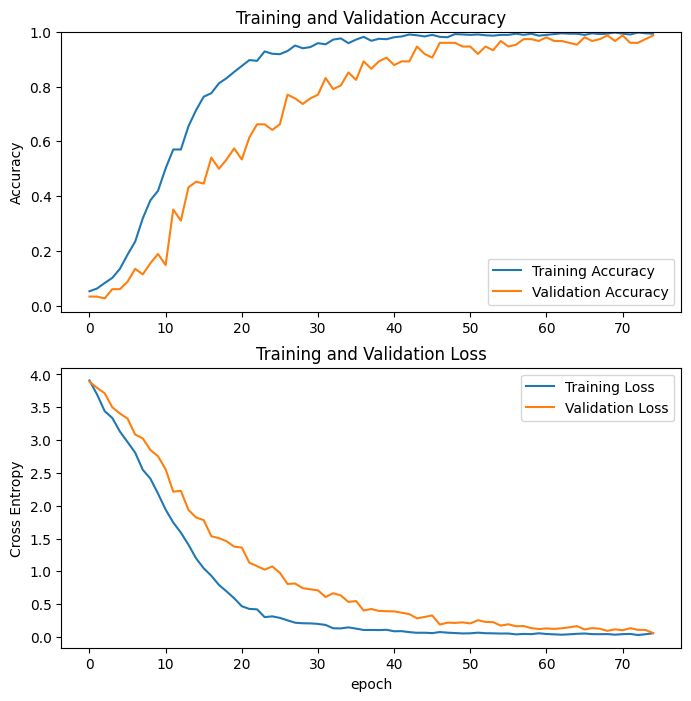

In [124]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [125]:
#train for another 25 epochs
epochs = 25

history_mobnet2 = mobnetv3_ft.fit(train_dataset,
                                epochs=epochs,
                                validation_data=val_dataset,
                                callbacks=[model_checkpoint_callback]
                                )

Epoch 1/25


11/11 [==============================] - 12s 1s/step - loss: 0.0396 - accuracy: 0.9899 - val_loss: 0.0796 - val_accuracy: 0.9797
Epoch 2/25
11/11 [==============================] - 12s 1s/step - loss: 0.0338 - accuracy: 0.9943 - val_loss: 0.1349 - val_accuracy: 0.9595
Epoch 3/25
11/11 [==============================] - 12s 1s/step - loss: 0.0331 - accuracy: 0.9957 - val_loss: 0.0681 - val_accuracy: 0.9865
Epoch 4/25
11/11 [==============================] - 12s 1s/step - loss: 0.0339 - accuracy: 0.9971 - val_loss: 0.0638 - val_accuracy: 0.9797
Epoch 5/25
11/11 [==============================] - 12s 1s/step - loss: 0.0348 - accuracy: 0.9943 - val_loss: 0.0601 - val_accuracy: 0.9865
Epoch 6/25
11/11 [==============================] - 12s 1s/step - loss: 0.0520 - accuracy: 0.9885 - val_loss: 0.0662 - val_accuracy: 0.9865
Epoch 7/25
11/11 [==============================] - 12s 1s/step - loss: 0.0436 - accuracy: 0.9957 - val_loss: 0.0739 - val_accuracy: 0.9797
Epoch 8/25
11/11 [=============

In [126]:
total_history_dict = dict()

for some_key in history.history.keys():
    current_values = [] # to save values from all history dicts
    for hist_dict in [history_mobnet.history, history_mobnet1.history, history_mobnet2.history]:
        current_values += hist_dict[some_key]
    total_history_dict[some_key] = current_values

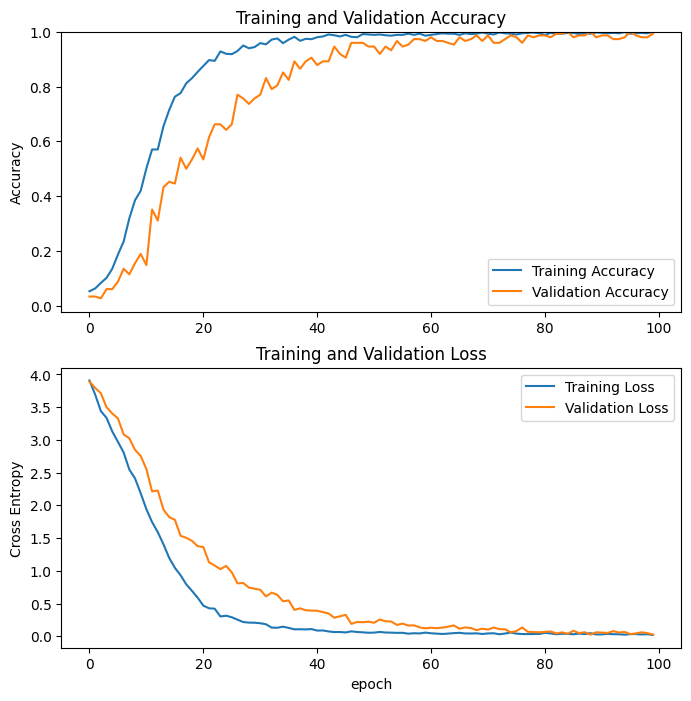

In [127]:
acc = total_history_dict['accuracy']
val_acc = total_history_dict['val_accuracy']

loss = total_history_dict['loss']
val_loss = total_history_dict['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [130]:
loss, accuracy = mobnetv3_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 0s 18ms/step - loss: 0.0273 - accuracy: 1.0000
Test accuracy : 1.0


In [131]:
from sklearn.metrics import confusion_matrix

test_labels = []
pred_labels = []
for images, labels in test_dataset:
    test_labels += list(labels.numpy())
    pred_logits = mobnetv3_ft.predict(images)
    pred_labels += list(tf.math.argmax(pred_logits, axis=1))

cm = confusion_matrix(test_labels, pred_labels)

1/1 [==============================] - 1s 526ms/step


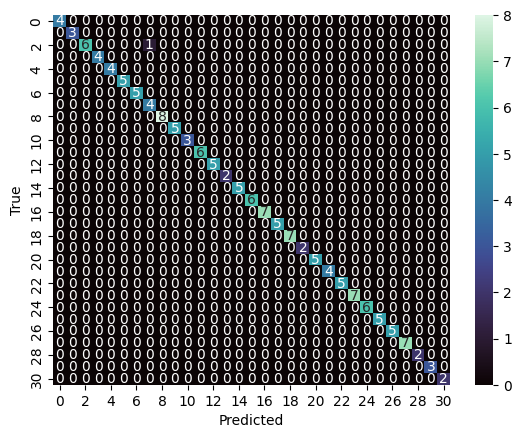

In [132]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

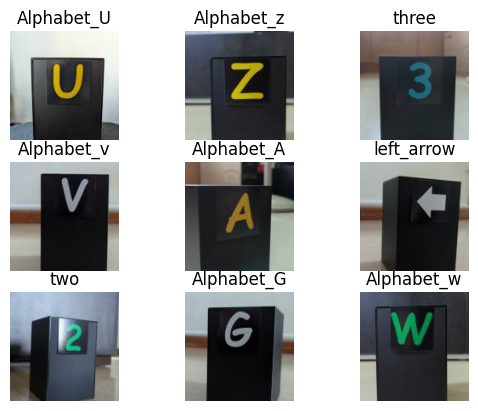

In [135]:
images, labels = next(iter(test_dataset))
preds = mobnetv3_ft(images)
preds = tf.math.argmax(preds, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [105]:
#mobnetv3_ft.save("./models/testing/mobnetv3_ft.keras")

##### effnet

In [136]:
effnetv2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    include_preprocessing=True
)

In [137]:
effnetv2.trainable = True

In [138]:
effnetv2.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 128, 128, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  0           ['rescaling_2[0][0]']            
                                                                                                  
 stem_conv (Conv2D)             (None, 64, 64, 32)   864         ['normalization[0

In [139]:
effnetv2_ft = keras.Sequential([
  keras.Input(shape=img_shape),
  data_augmentation,
  layers.Rescaling(255),
  effnetv2,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(len(classes))
])

In [80]:
effnetv2_ft.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 4, 4, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_7 (Dense)             (None, 31)               

In [140]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [141]:
effnetv2_ft.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [142]:
checkpoint_filepath = 'models/testing/effnetv2_ft.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [143]:
epochs = 50

history = effnetv2_ft.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=[model_checkpoint_callback]
                    )

Epoch 1/50


11/11 [==============================] - 34s 2s/step - loss: 3.4535 - accuracy: 0.0560 - val_loss: 3.3394 - val_accuracy: 0.0676
Epoch 2/50
11/11 [==============================] - 24s 2s/step - loss: 3.2001 - accuracy: 0.1193 - val_loss: 3.1434 - val_accuracy: 0.1757
Epoch 3/50
11/11 [==============================] - 25s 2s/step - loss: 2.9658 - accuracy: 0.2572 - val_loss: 2.8209 - val_accuracy: 0.4189
Epoch 4/50
11/11 [==============================] - 22s 2s/step - loss: 2.6300 - accuracy: 0.4325 - val_loss: 2.3041 - val_accuracy: 0.6419
Epoch 5/50
11/11 [==============================] - 22s 2s/step - loss: 2.1870 - accuracy: 0.6164 - val_loss: 1.7906 - val_accuracy: 0.7568
Epoch 6/50
11/11 [==============================] - 23s 2s/step - loss: 1.7546 - accuracy: 0.7284 - val_loss: 1.2136 - val_accuracy: 0.8919
Epoch 7/50
11/11 [==============================] - 24s 2s/step - loss: 1.2508 - accuracy: 0.8750 - val_loss: 0.9090 - val_accuracy: 0.8986
Epoch 8/50
11/11 [=============

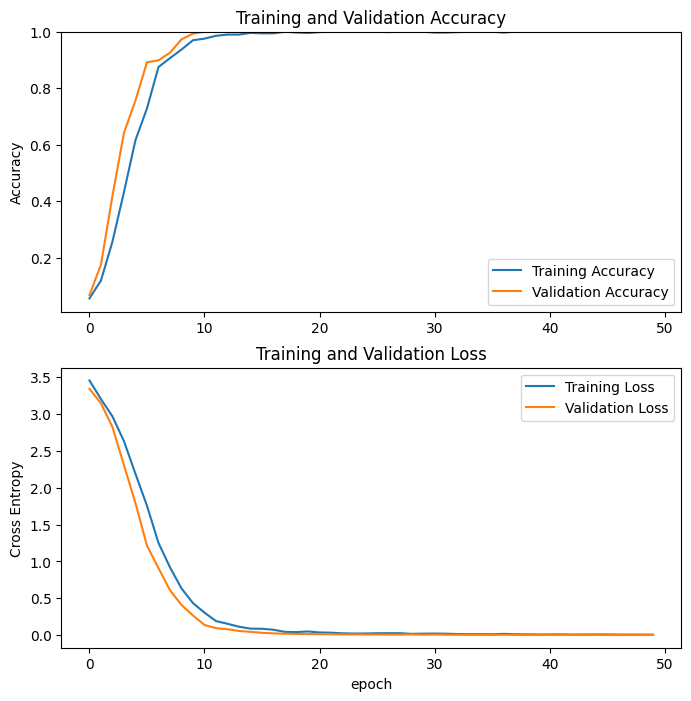

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [145]:
loss, accuracy = effnetv2_ft.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 [==============================] - 1s 28ms/step - loss: 0.0022 - accuracy: 1.0000
Test accuracy : 1.0


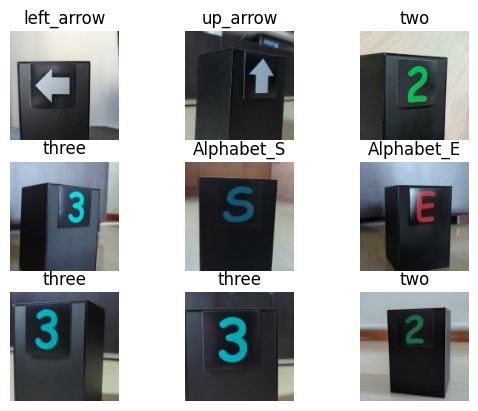

In [146]:
images, labels = next(iter(test_dataset))
preds_logits = effnetv2_ft(images)
preds = tf.math.argmax(preds_logits, 1).numpy()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(classes[int(preds[i])])
    plt.axis("off")

In [87]:
#mobnetv3_ft.save("./models/testing/effnetv2_ft.keras")